In [25]:
#Import Libraries
import numpy as np #for mathematical calculations
import pandas as pd #data preprocessing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
#ignore all warnings
import warnings
warnings.filterwarnings("ignore")

#load dataset
data = pd.read_csv ('netflix_titles.csv') 

In [26]:
print("Shape: ",data.shape)
print("Size: ",data.size, "\n")
print("Columns: \n",data.columns, "\n")
print("Data Types: \n",data.dtypes)

Shape:  (8807, 12)
Size:  105684 

Columns: 
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 

Data Types: 
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [27]:
#Checking duplicate values if present
print("Duplicate values: ",data.duplicated().any(), "\n")
#Sum of null values in each row
print("NUll values: ", data.isnull().sum())

Duplicate values:  False 

NUll values:  show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<Figure size 720x504 with 0 Axes>

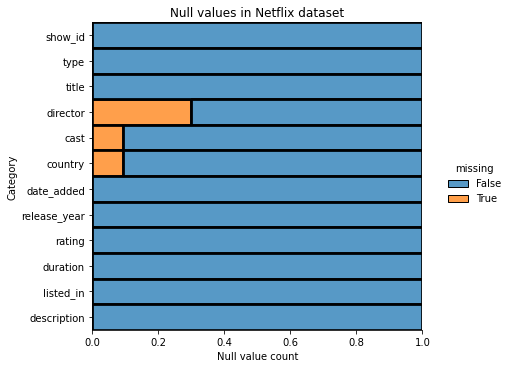

In [61]:
#Plotting null values
plt.figure(figsize=(10,7))
plot_null = sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plot_null.set(xlabel ="Null value count", ylabel = "Category", title ='Null values in Netflix dataset')
plt.show()

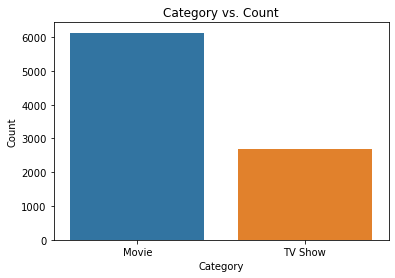

In [62]:
#Change date to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

#Plotting the number of movies and tv shows
# data.groupby('type').type.count()
plot_type = sns.countplot(data['type'])
plot_type.set(xlabel ="Category", ylabel = "Count", title = "Category vs. Count")
plt.show()

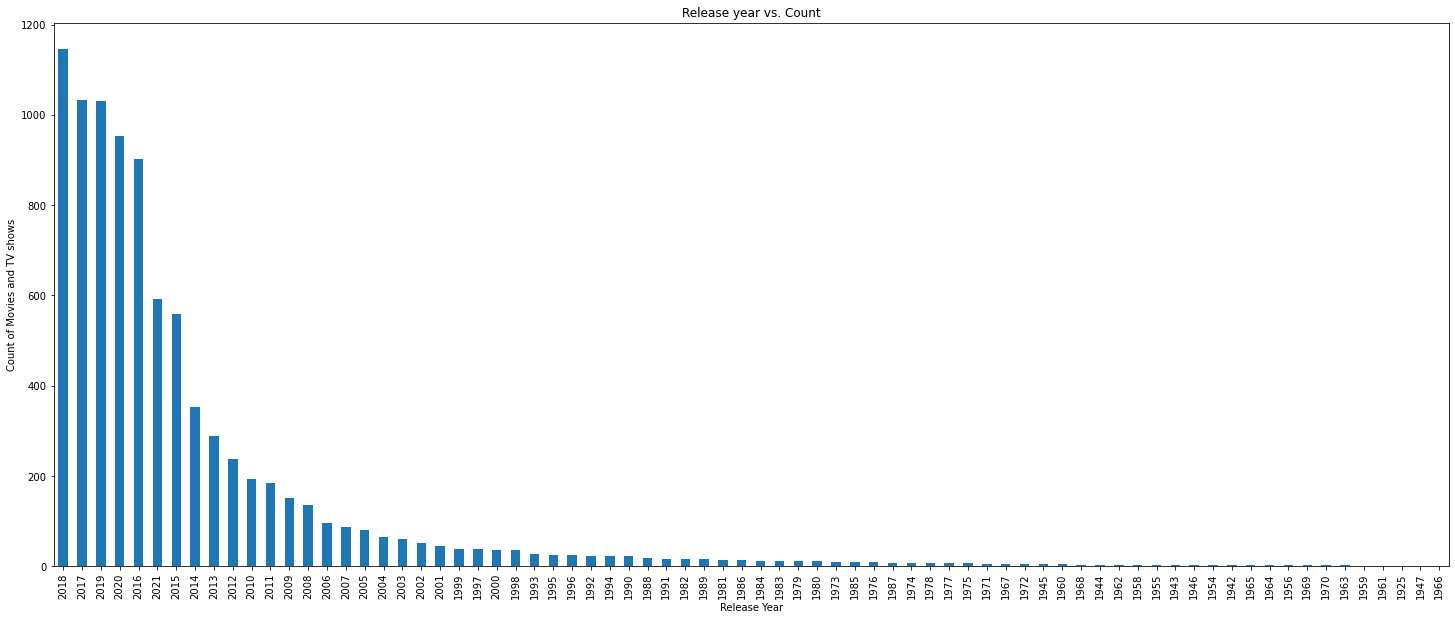

In [85]:
#Plotting bar graph for movies and tv shows against release year
plt.figure(figsize=(25,10))
plot_releaseyr = data['release_year'].value_counts().plot(kind='bar')
plot_releaseyr.set(xlabel ="Release Year", ylabel = "Count of Movies and TV shows", title = "Release year vs. Count")
plt.show()

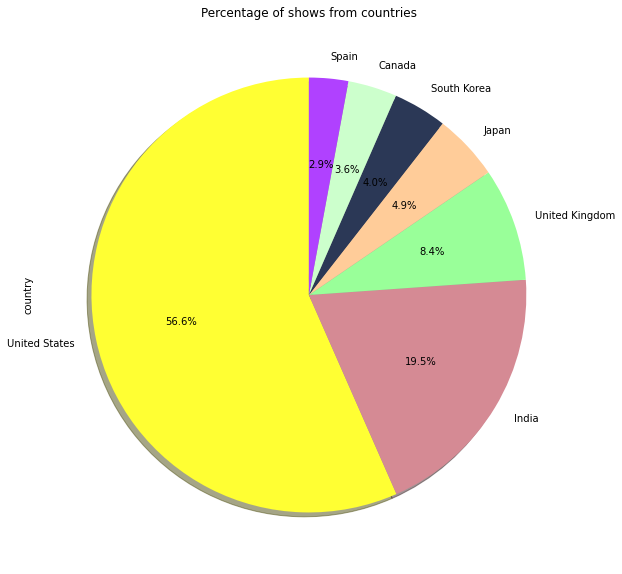

In [155]:
# data2 = data.copy()
data = data[data['country'].isin(['India', 'United States', 'Japan', 'South Korea', 'Spain', 'Canada', 'United Kingdom'])]

# Pie plot for the country of shows
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))
plt.title = ('Country with shows')
ax.set_title("Percentage of shows from countries")
data['country'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True, startangle = 90, colors = ['#FFFF33','#D58A94','#99ff99','#ffcc99','#2B3856','#CCFFCC','#B041FF']);
plt.show()